In [9]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import pack_vis_sol
import pack_dynamics
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)


<Axes: >

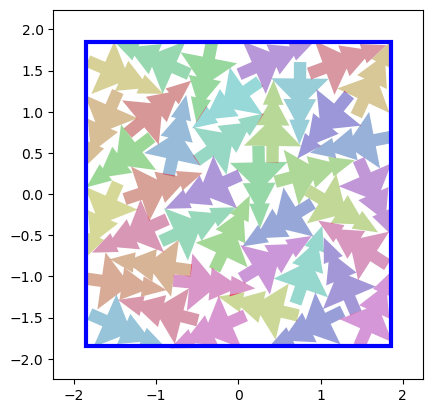

In [10]:
ga = kgs.dill_load(kgs.code_dir+'../../results/test_ga_result_ga.dill')
pop = ga.populations[0]
pop.select_ids([(np.argmin(pop.fitness))])
sol = pop.configuration
sol.xyt = sol.xyt.astype(kgs.dtype_cp)
sol.h = sol.h.astype(kgs.dtype_cp)
pack_vis_sol.pack_vis_sol(sol)

9.999999999177334e-06
Before optimization:  0.14581570029258728 0.00891568511724472 3.7


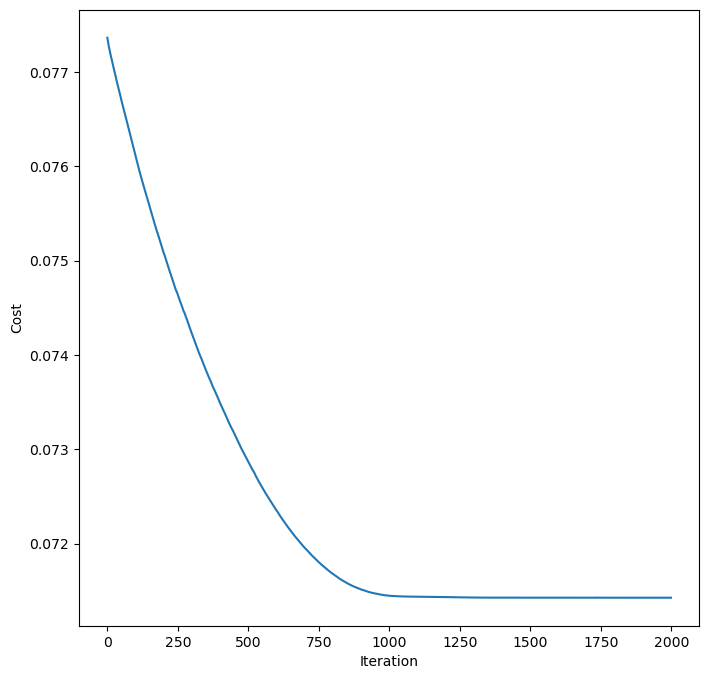

After optimization:  0.142446830868721 0.0004040821804665029 3.7688558


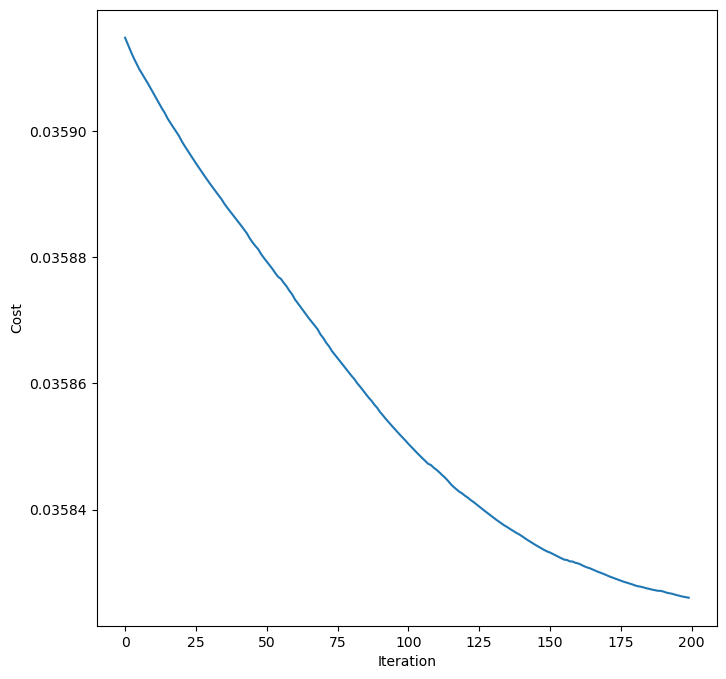

After optimization:  0.1428934633731842 0.00013672825298272073 3.7783163


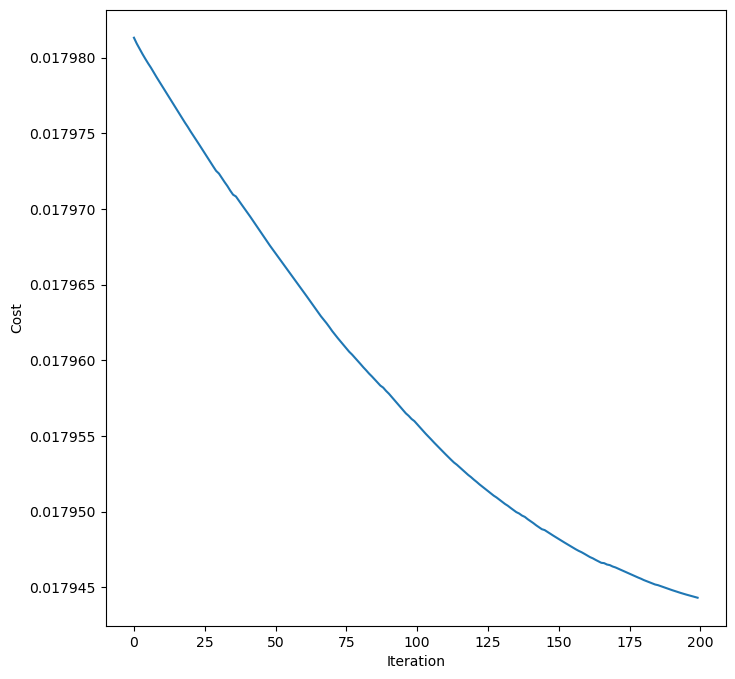

After optimization:  0.14326655864715576 4.107425775146112e-05 3.7845142


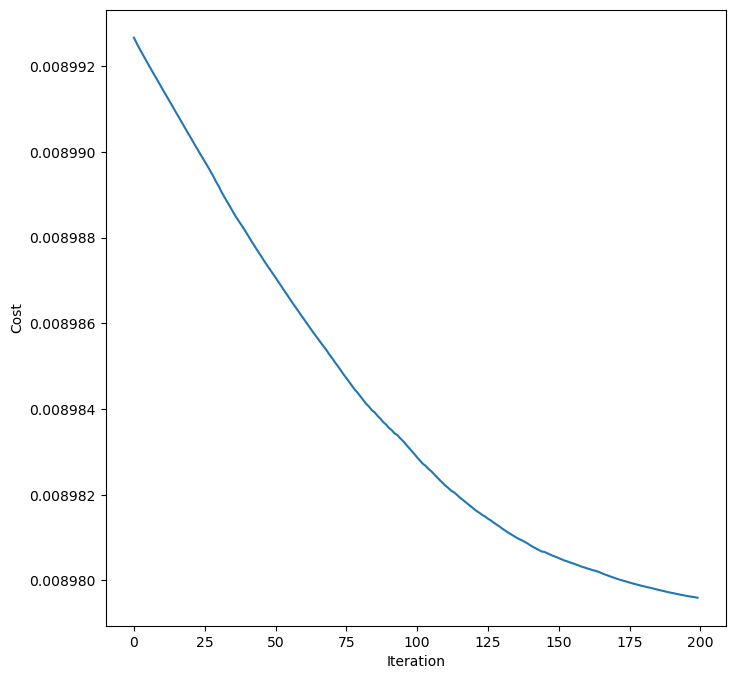

After optimization:  0.14353175461292267 9.440733265364543e-06 3.7884338


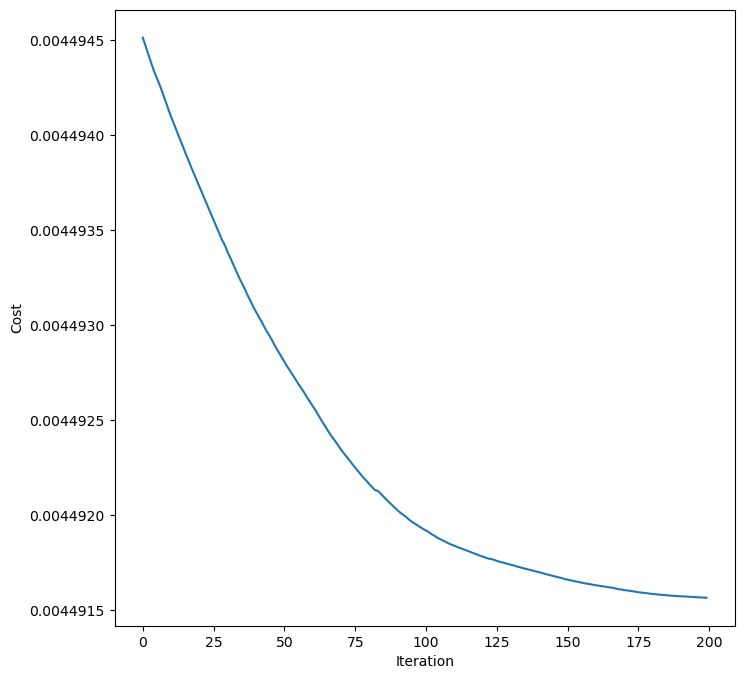

After optimization:  0.14367003738880157 1.935975433298154e-06 3.7903576


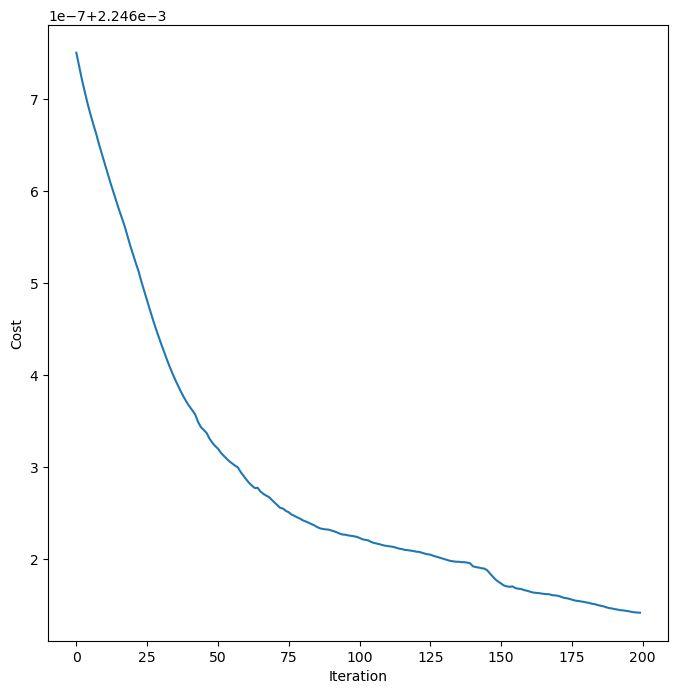

After optimization:  0.1437225341796875 4.840586029786209e-07 3.791069


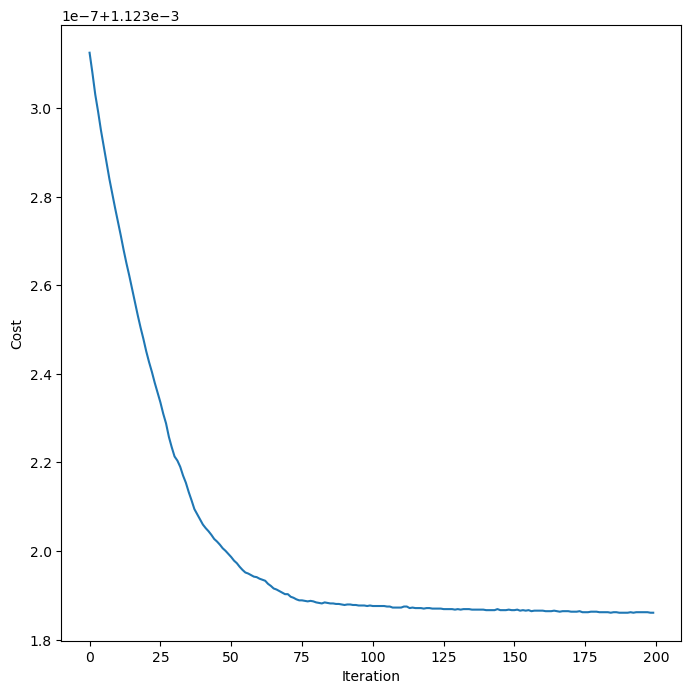

After optimization:  0.14375139772891998 1.2930384230003256e-07 3.7914546


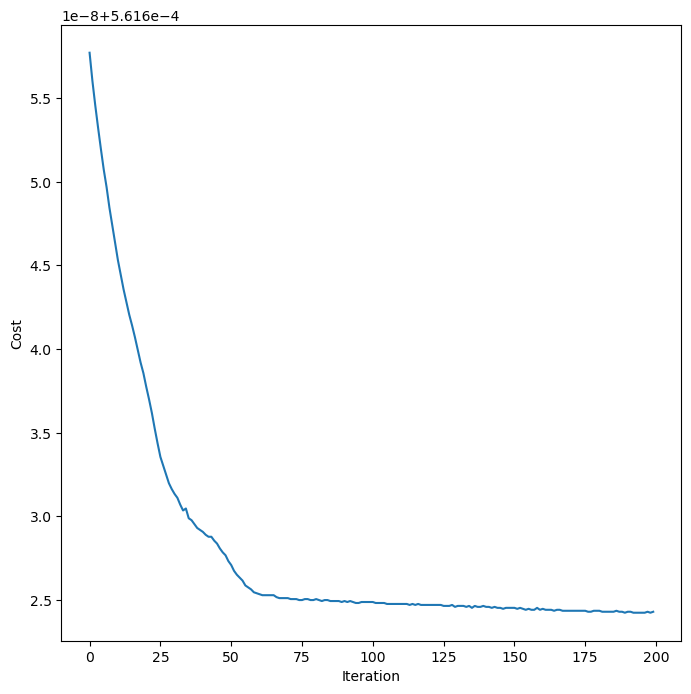

After optimization:  0.14376716315746307 3.394718106619621e-08 3.7916634


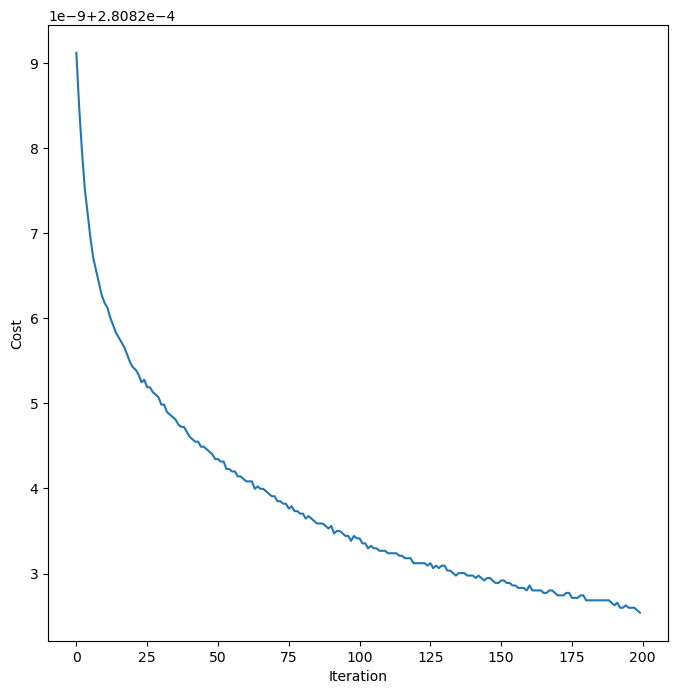

After optimization:  0.14377328753471375 1.537483740321477e-08 3.7917447


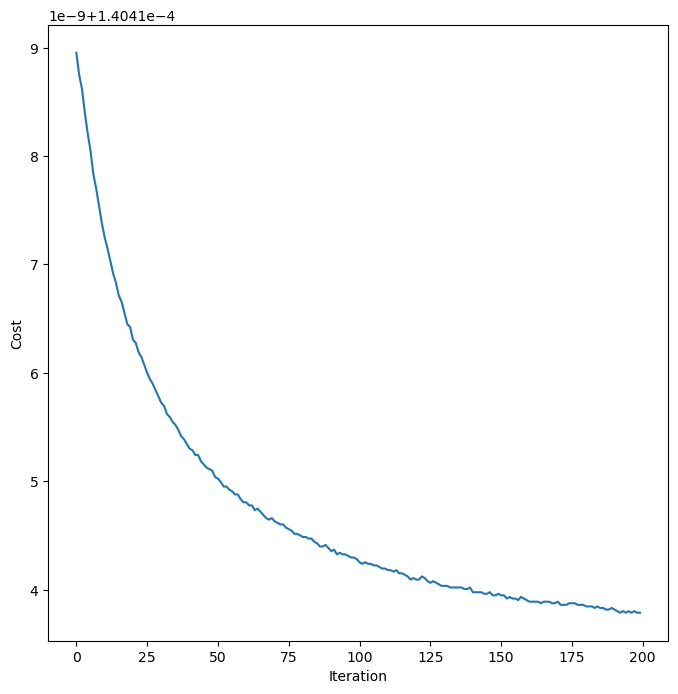

After optimization:  0.14377951622009277 4.106615492105448e-09 3.791827


In [48]:
print(kgs.TREE_EXPANSION)
solx = copy.deepcopy(sol)
solx.use_fixed_h = False
solx.snap()
cost = copy.deepcopy(ga.fitness_cost)
#cost.costs[0].scaling*=0.1
cost_overlap = copy.deepcopy(cost)
cost_overlap.costs.pop(0)
optimizer = pack_dynamics.OptimizerBFGS()
optimizer.cost = copy.deepcopy(cost)
optimizer.n_iterations = 2000
optimizer.max_step = 1e-4
optimizer.history_size = 10
optimizer.track_cost = True
optimizer.plot_cost = True
optimizer.use_line_search = False
print("Before optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])
for _ in range(10):
    optimizer.cost.costs[0].scaling*=0.5
    optimizer.max_step*=np.sqrt(0.5)    
    solx = optimizer.run_simulation(solx)
    optimizer.n_iterations = 200
    print("After optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])


In [49]:
# print(" ", cost.compute_cost_ref(solx)[0].get().item(), cost_overlap.compute_cost_ref(solx)[0].get().item(), solx.h[0,0])
# kgs.TREE_EXPANSION=0.
# kgs.initialize_tree_globals()
# print(" ", cost.compute_cost_ref(solx)[0].get().item(), cost_overlap.compute_cost_ref(solx)[0].get().item(), solx.h[0,0])

In [53]:
import pack_io
import pack_metric
importlib.reload(pack_io)
importlib.reload(pack_metric)
pack_io.solution_list_to_dataframe([solx], compact=True)

Score of generated dataframe: 0.3594491585266896


,id,x,y,deg
0,040_0,s-1.2053373736567097,s0.894100433607058,s310.34869384765625
1,040_1,s-1.209761097941518,s0.020701830709061987,s286.7107849121094
2,040_2,s-1.691809358668318,s-1.0999840951748037,s-95.13426971435547
3,040_3,s-0.7962670930198481,s-0.903697289132304,s84.86649322509766
4,040_4,s-1.575837306085308,s1.0886097748580346,s156.89254760742188
5,040_5,s1.5344739521875645,s1.1669653295080484,s333.80059814453125
6,040_6,s-1.6784215994776797,s1.5698636272570983,s246.35086059570312
7,040_7,s-1.5770960332060413,s-0.02232023353152719,s156.3699493408203
8,040_8,s0.5554813805219151,s-1.4427545993423916,s76.50830078125
9,040_9,s1.033241636333824,s-0.05231741057271885,s-120.64022827148438


In [55]:
import pack_io
import pack_metric
importlib.reload(pack_io)
importlib.reload(pack_metric)
pack_io.solution_list_to_dataframe([pack_io.legalize(sol)], compact=True)

Before optimization:  0.14581570029258728 0.008915686048567295 3.7


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:59: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:90: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.142446830868721 0.0004040821804665029 3.7688558
After optimization:  0.1428934633731842 0.00013672825298272073 3.7783163
After optimization:  0.14326655864715576 4.107425775146112e-05 3.7845142
After optimization:  0.14353175461292267 9.440733265364543e-06 3.7884338
After optimization:  0.14367003738880157 1.935975433298154e-06 3.7903576
After optimization:  0.1437225341796875 4.840586598220398e-07 3.791069
After optimization:  0.14375139772891998 1.2930384230003256e-07 3.7914546
After optimization:  0.14376716315746307 3.394718106619621e-08 3.7916634
After optimization:  0.14377328753471375 1.537483740321477e-08 3.7917447
After optimization:  0.14377951622009277 4.106615492105448e-09 3.791827
After optimization:  0.14378288388252258 8.01819610707355e-10 3.7918713
After optimization:  0.1437840759754181 2.898631057401957e-10 3.791887
After optimization:  0.14378489553928375 5.925629431580148e-11 3.791898
Score of generated dataframe: 0.35945214716253565


,id,x,y,deg
0,040_0,s-1.2053411272610661,s0.8941143666632012,s310.3476257324219
1,040_1,s-1.209783989912493,s0.02070510935153586,s286.70794677734375
2,040_2,s-1.6918221900147379,s-1.099989135700791,s-95.13412475585938
3,040_3,s-0.7962856781561645,s-0.903696740459077,s84.86738586425781
4,040_4,s-1.5758501235751237,s1.0886215107359383,s156.89404296875
5,040_5,s1.5344552081318554,s1.1669525051691887,s333.80059814453125
6,040_6,s-1.6783914412530447,s1.5698535106742013,s246.3522491455078
7,040_7,s-1.577118848748162,s-0.022310781907540926,s156.3699493408203
8,040_8,s0.5555087480936756,s-1.4427400750602473,s76.50971984863281
9,040_9,s1.0332421278023511,s-0.05231578058783956,s-120.63966369628906


In [ ]:
optimizer.cost.costs[0].scaling

9.5367431640625e-09

In [ ]:
3.7881706**2/40

0.358755912367609